# Coupled climate variability

The study of Coupled Climate Variability answer to the question : 
<center>
    <strong>How do two large climate fields vary together in space and time ?</strong>
</center>

In our case of study, we will study the variation between **Sea Surface Temperature (SST)** & **Sea Level Pressure (SLP)**.

## **Canonical Correlation Analysis (CCA)**

Canonical Correlation Analysis is a statistical technique used to analyze the relationship between two sets of variables. It seeks to find linear combinations of the variables in each set that are maximally correlated with each other. The goal of CCA is to identify patterns of association between the two sets of variables.

In other words: 
<center>
    <strong>CCA seeks optimal projection bases for two datasets such that the correlation between corresponding projected components is maximized</strong>.
</center>

#### **Given two datasets: X $\in \mathbf{M}_{T,p}$ and Y $\in \mathbf{M}_{T,q}$ :**

- It finds vectors a and b
- With variance constraints to avoid trivial solutions: $\text{Var}(Xa) = 1, \text{Var}(Yb) = 1$
- Such that the correlation between Xa and Yb is maximal

$$\max_{a,b} \text{corr}(Xa, Yb)$$


While PCA & EOF (SVD-based methods) choose modes that maximize explained variance, which is mainly a spatial viewpoint, 
<center> <strong>CCA </strong> chooses modes that maximize correlation between the  <strong>time coefficients </strong> of two datasets, i.e. a  <strong>temporal viewpoint </strong> focused on coupled time evolution.</center>

That means find a & b that maximize : $$\rho=\operatorname{corr}(Xa, Yb) = \frac{\operatorname{cov}(Xa, Yb)}{\sqrt{\operatorname{var}(Xa)\operatorname{var}(Yb)}}= \frac{a^T\operatorname{cov}(X, Y)b}{\sqrt{(a^T\operatorname{cov}(X,X)a)(b^T\operatorname{cov}(Y,Y)b)}}$$

$\\[20pt]$
$$\text{subject to:} \quad a^T\operatorname{cov}(X,X)a=1, \quad b^T\operatorname{cov}(Y,Y)b=1$$


$\\[50pt]$
Let's denote : $\Sigma_{XX} = \operatorname{cov}(X, X), \quad$
$\Sigma_{YY} = \operatorname{cov}(Y, Y), \quad$
$\Sigma_{XY} = \operatorname{cov}(X, Y)$


So we need to solve the optimization problem:   $$\max_{a,b} {\rho=a^T\Sigma_{XY}b}$$
$\\[10pt]$
$$\text{subject to:} \quad a^T\Sigma_{XX}a=1, \quad b^T\Sigma_{YY}b=1$$


**The Lagrangien** is defined as follows :    $$\mathcal{L}(a, b, \lambda) = a^T \Sigma_{XY} b - \frac{\lambda_1}{2}(a^T \Sigma_{XX} a - 1) - \frac{\lambda_2}{2}(b^T \Sigma_{YY} b - 1)$$

**Derivative with respect to a**:

$$
\frac{\partial}{\partial a} \left( a^\top \Sigma_{XY} b \right) = \Sigma_{XY} b
$$
$$
\frac{\partial}{\partial a} \left( \frac{1}{2} a^\top \Sigma_{XX} a \right) = \Sigma_{XX} a
$$

So:

$$
\Sigma_{XY} b - \lambda_1 \Sigma_{XX} a = 0
$$
$$
\boxed{\Sigma_{XY} b = \lambda_1 \Sigma_{XX} a} \quad(1)
$$

**Derivative with respect to b**:

Similarly:

$$
\Sigma_{YX} a - \lambda_2 \Sigma_{YY} b = 0
$$
$$
\boxed{\Sigma_{YX} a = \lambda_2 \Sigma_{YY} b} \quad (2)
$$

Multiplying $(1)$ on the left by $a^T$:   $$a^T\Sigma_{XY} b = \lambda_1 a^T\Sigma_{XX} a \implies \lambda_1=\rho$$

Similarity for $(2)$: $$\lambda_2=\rho$$

Thus the system becomes:

$$\Sigma_{XY} b = \rho \Sigma_{XX} a \quad (1')$$

$$\Sigma_{YX} a = \rho \Sigma_{YY} b \quad (2')$$

From $(2')$, $$b=\rho^{-1} \Sigma_{YY}^{-1} \Sigma_{YX} a$$
Substitute into $(1')$:  $$\Sigma_{XY} (\rho^{-1} \Sigma_{YY}^{-1} \Sigma_{YX}a) = \rho \Sigma_{XX} a $$
Multiply by $\rho$: $$\boxed{\Sigma_{XY} \Sigma_{YY}^{-1} \Sigma_{YX}a = \rho^2 \Sigma_{XX} a} $$
Same for $a$, We get : $$\boxed{\Sigma_{YX} \Sigma_{XX}^{-1} \Sigma_{XY} b = \rho^2 \Sigma_{YY} b}$$

#### So We have Turned The maximization problem into a **generalized eigenvalue problem** $$Mv=\lambda Nv$$


- The eigenvectors $a$ and $b$ give the directions in $X$ and $Y$ that are maximally correlated.
- The eigenvalues $\rho^2$ give the squared canonical correlations.
- $\rho_k$ measures the strength of coupling between the two climate fields at mode $k$.

This is how **CCA** reduces to a solvable linear algebra problem — once you compute the covariances, you just solve these eigenproblems.

From these, we construct: 
- $\text{Canonical variates (Time Series):}\quad u_k=Xa_k, \qquad v_k=Yb_k$
* $(u_k,v_k)$ represents the temporal signals that are maximally correlated.
- $\text{Canonical correlations (Strength):} \quad \rho_k$

### **Canonical patterns (spatial maps)** :
The canonical pattern are defined as:
$$P_{X,k}=\operatorname{cov}(X,u_k)$$
$$P_{Y,k}=\operatorname{cov}(Y,u_k)$$

Canonical patterns describe the spatial regions where each field is most strongly linked to the canonical time series that are maximally correlated in time.

### The need of **PCA** before CCA

when  $p,q>>T$ : the Covariance matrices become ill-conditioned (sensitive to errors), 

So we Apply **PCA** (**EOF** analysis), to reduce dimensionality , Filter noise and ensures that covariance matrices used in CCA are well-conditioned.

# Implementation

In [39]:
#Load Librairies

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib as mpl
import warnings

mpl.rc('font', size=14)
warnings.filterwarnings("ignore")


In [40]:
# load data

sst = xr.open_dataset(r"D:\Study\S 3\M16 Dimensionality Reduction\sst.mnmean.nc")
slp = xr.open_dataset(r"D:\Study\S 3\M16 Dimensionality Reduction\slp.mnmean.nc")

# Select variable names
sst = sst['sst']
slp = slp['slp']

# Select time and region
sst = sst.sel(time=slice("1954-01-01", "2017-12-31"),
              lat=slice(30, -30))
slp = slp.sel(time=slice("1954-01-01", "2017-12-31"),
              lat=slice(30, -30))


#normalize monthly timestamps
sst['time'] = sst.indexes['time'].to_period('M').to_timestamp()
slp['time'] = slp.indexes['time'].to_period('M').to_timestamp()


#explicitly align time axes
sst, slp = xr.align(sst_t, slp, join="inner")


#Verification
print(sst.shape)
print(slp.shape)   
##(month, lat, lon)
print(sst.time.equals(slp.time))

(528, 31, 180)
(528, 31, 180)
True


In [41]:
# Preprocessing
# Seasonal averaging

def seasonal_mean(da, months):
    da = da.where(da['time.month'].isin(months), drop=True)
    return da.groupby('time.year').mean('time')


slp_djfm = seasonal_mean(slp, [12, 1, 2, 3])
sst_djfm = seasonal_mean(sst, [12, 1, 2, 3])

slp_anom = slp_djfm - slp_djfm.mean('year')
sst_anom = sst_djfm - sst_djfm.mean('year')



#detrending

def detrend_yearly(da):
    p = da.polyfit(dim='year', deg=1)
    trend = xr.polyval(da['year'], p.polyfit_coefficients)
    return da - trend

slp_anom = detrend_yearly(slp_anom)
sst_anom = detrend_yearly(sst_anom)

#### Area weighting

Because grid cells shrink with latitude.

Weight factor: $$\omega(\phi)=\sqrt{cos(\phi)}$$

In [42]:
weights = np.sqrt(np.cos(np.deg2rad(sst_anom.lat)))
weights = weights / weights.mean()

sst_w = sst_anom * weights
slp_w = slp_anom * weights

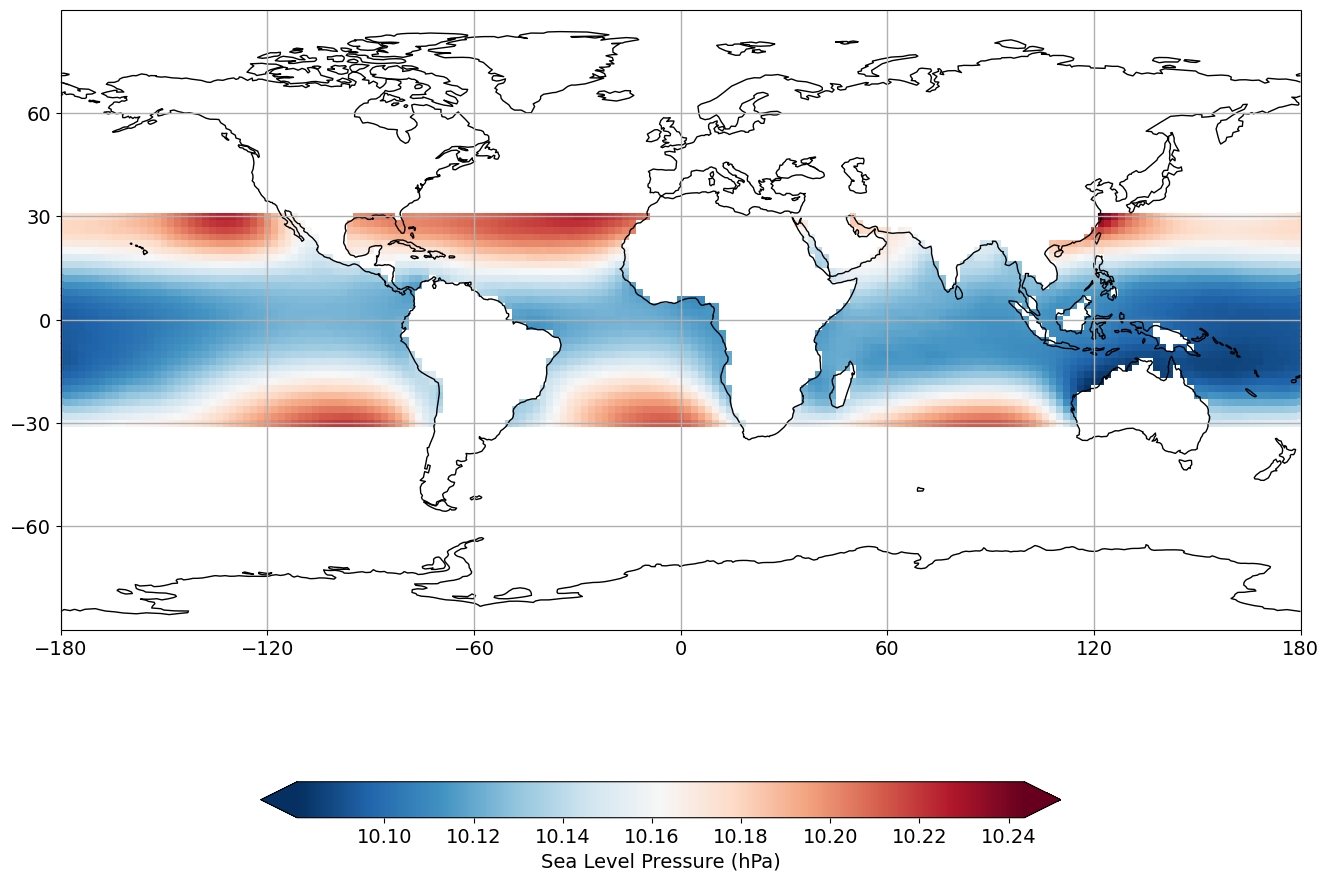

In [43]:
#Visualize Sea Level Pressure

fig = plt.figure(figsize=(16,12))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_global()
ax.coastlines()
ax.gridlines(linewidth=1)



ax.set_xticks([-180, -120, -60, 0, 60, 120, 180], crs=ccrs.PlateCarree())
ax.set_yticks([-60, -30, 0, 30, 60], crs=ccrs.PlateCarree())

pc = ax.pcolormesh(
    slp.lon,
    slp.lat,
    slp_djfm.mean('year') / 100.0,
    cmap="RdBu_r",
    transform=ccrs.PlateCarree()
)

cax = fig.add_axes([0.25, 0.08, 0.5, 0.03])
cb = fig.colorbar(pc, cax=cax, orientation='horizontal', extend='both')
cb.set_label("Sea Level Pressure (hPa)")


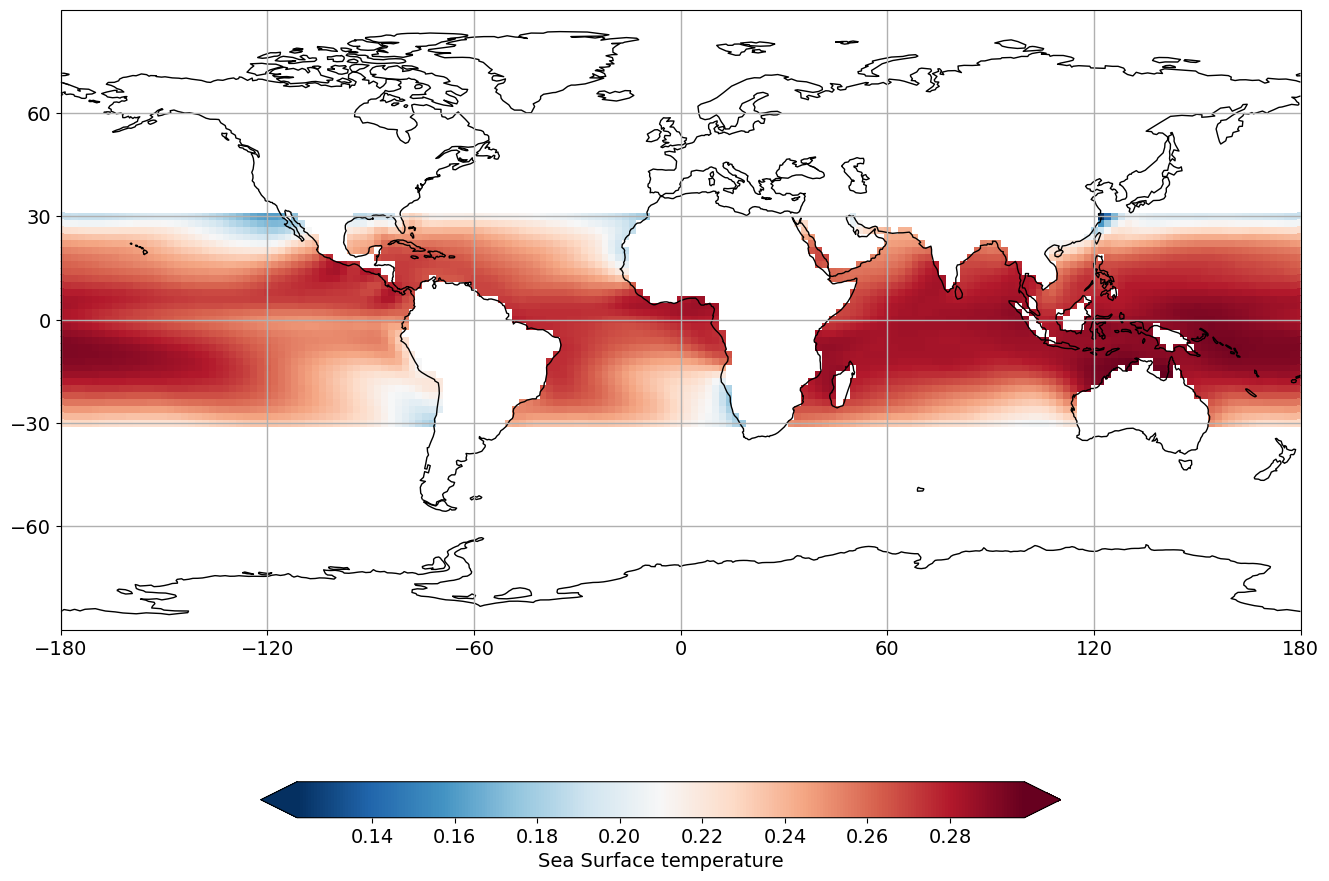

In [44]:
#Visualize Sea Surface temperature

fig = plt.figure(figsize=(16,12))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_global()
ax.coastlines()
ax.gridlines(linewidth=1)



ax.set_xticks([-180, -120, -60, 0, 60, 120, 180], crs=ccrs.PlateCarree())
ax.set_yticks([-60, -30, 0, 30, 60], crs=ccrs.PlateCarree())

pc = ax.pcolormesh(
    sst.lon,
    sst.lat,
    sst_djfm.mean('year') / 100.0,
    cmap="RdBu_r",
    transform=ccrs.PlateCarree()
)

cax = fig.add_axes([0.25, 0.08, 0.5, 0.03])
cb = fig.colorbar(pc, cax=cax, orientation='horizontal', extend='both')
cb.set_label("Sea Surface temperature")


In [45]:
# Reshape (T, space)

X = sst_w.stack(space=("lat", "lon"))
Y = slp_w.stack(space=("lat", "lon"))


print(X.shape)  
print(Y.shape)  

(44, 5580)
(44, 5580)


In [46]:
def remove_zero_variance_with_mask(X):
    std = X.std(dim="year")
    mask = std > 0
    return X[:, mask], mask

X, mask_X = remove_zero_variance_with_mask(X)
Y, mask_Y = remove_zero_variance_with_mask(Y)


In [47]:
X_np = X.values
Y_np = Y.values


In [48]:
# Standardization

X_np = (X_np - X_np.mean(axis=0)) / X_np.std(axis=0)
Y_np = (Y_np - Y_np.mean(axis=0)) / Y_np.std(axis=0)



### PCA

In [49]:
from sklearn.decomposition import PCA

#Keep the minimum number of EOFs needed to explain 90% of the variance.

pca_x = PCA(n_components=0.9)
pca_y = PCA(n_components=0.9)

X_pca = pca_x.fit_transform(X_np)
Y_pca = pca_y.fit_transform(Y_np)


#Check retained dimensions
print("SST EOFs retained:", X_pca.shape[1])
print("SLP EOFs retained:", Y_pca.shape[1])

SST EOFs retained: 19
SLP EOFs retained: 9


### CCA

In [50]:
from sklearn.cross_decomposition import CCA

n_modes = min(X_pca.shape[1], Y_pca.shape[1], 10)

cca = CCA(n_components=n_modes)
U, V = cca.fit_transform(X_pca, Y_pca)


In [51]:
#Canonical correlations

canonical_corrs = [np.corrcoef(U[:, k], V[:, k])[0, 1] for k in range(n_modes)]

Text(0, 0.5, 'Standardized amplitude')

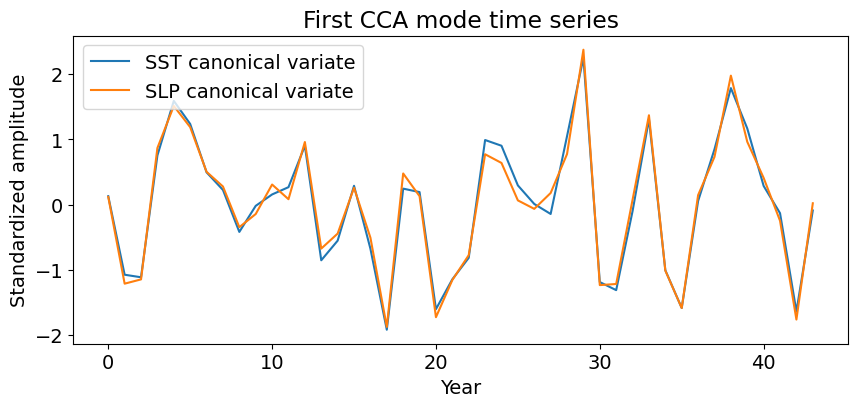

In [52]:
#Plot canonical variates

plt.figure(figsize=(10,4))
plt.plot(U[:,0], label="SST canonical variate")
plt.plot(V[:,0], label="SLP canonical variate")
plt.legend()
plt.title("First CCA mode time series")
plt.xlabel("Year")
plt.ylabel("Standardized amplitude")


This graph confirms that the "First CCA Mode" is a valid and physically meaningful relationship. Because the lines overlap so well, we can conclude that the spatial pattern of SST identified by the CCA is a very reliable predictor of the spatial pattern of SLP for this specific dataset.

Text(0, 0.5, 'Standardized amplitude')

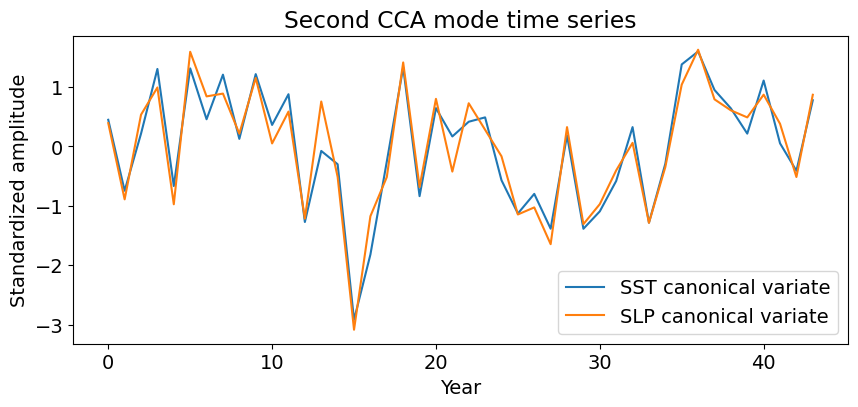

In [53]:
#Plot canonical variates

plt.figure(figsize=(10,4))
plt.plot(U[:,1], label="SST canonical variate")
plt.plot(V[:,1], label="SLP canonical variate")
plt.legend()
plt.title("Second CCA mode time series")
plt.xlabel("Year")
plt.ylabel("Standardized amplitude")


In [54]:
#Canonical Patterns for the first mode


sst_pattern = np.corrcoef(X_np.T, U[:, 0], rowvar=True)[-1, :-1]
slp_pattern = np.corrcoef(Y_np.T, V[:, 0], rowvar=True)[-1, :-1]


In [55]:
# Reshape to maps

sst_map = xr.DataArray(
    sst_pattern,
    dims=["space"],
    coords={"space": X.space}
).unstack("space")



slp_map = xr.DataArray(
    slp_pattern,
    dims=["space"],
    coords={"space": Y.space}
).unstack("space")



Text(0.5, 1.0, 'CCA Mode 1 – SST Canonical Pattern')

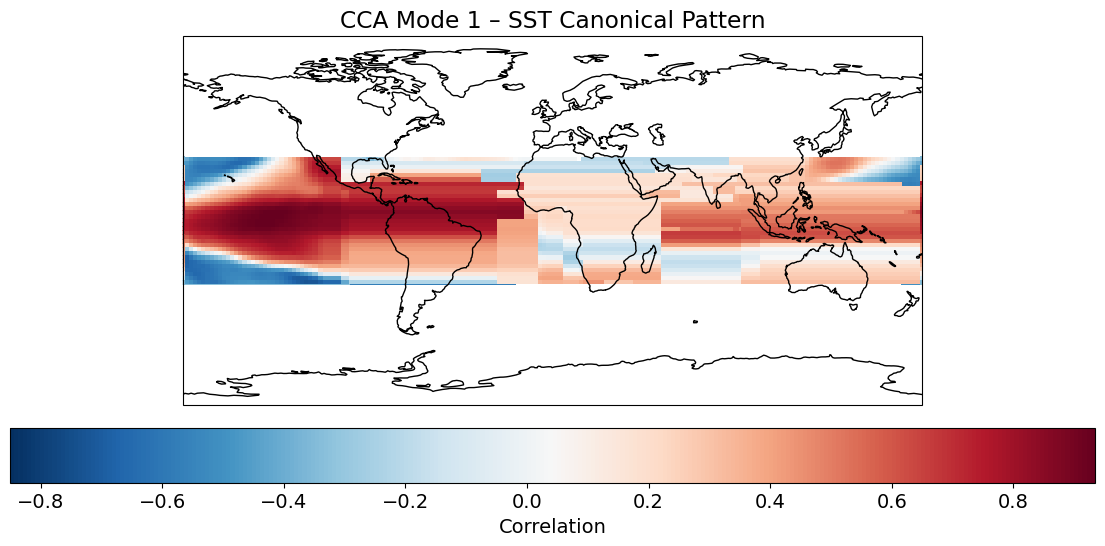

In [56]:
#SST Canonical Pattern

fig = plt.figure(figsize=(14,6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines()

pc = ax.pcolormesh(
    sst_map.lon,
    sst_map.lat,
    sst_map,
    cmap="RdBu_r",
    transform=ccrs.PlateCarree()
)

cb = plt.colorbar(pc, orientation="horizontal", pad=0.05)
cb.set_label("Correlation")

ax.set_title("CCA Mode 1 – SST Canonical Pattern")


#### **Correlation Scale** : The color bar at the bottom indicates the strength and direction of the correlation between the local SST at each pixel and the overall Canonical Variate (the time-series pattern for Mode 1).

#### **Positive Correlations** : These regions have SSTs that increase and decrease in lockstep with the Mode 1 time series. If the time series is positive, these areas are warmer than average; if negative, they are cooler.

#### **Negative Correlations** : These regions vary inversely with the time series. For example, when the Mode 1 time series is high, these areas are cooler than average.

Text(0.5, 1.0, 'CCA Mode 1 – SLP Canonical Pattern')

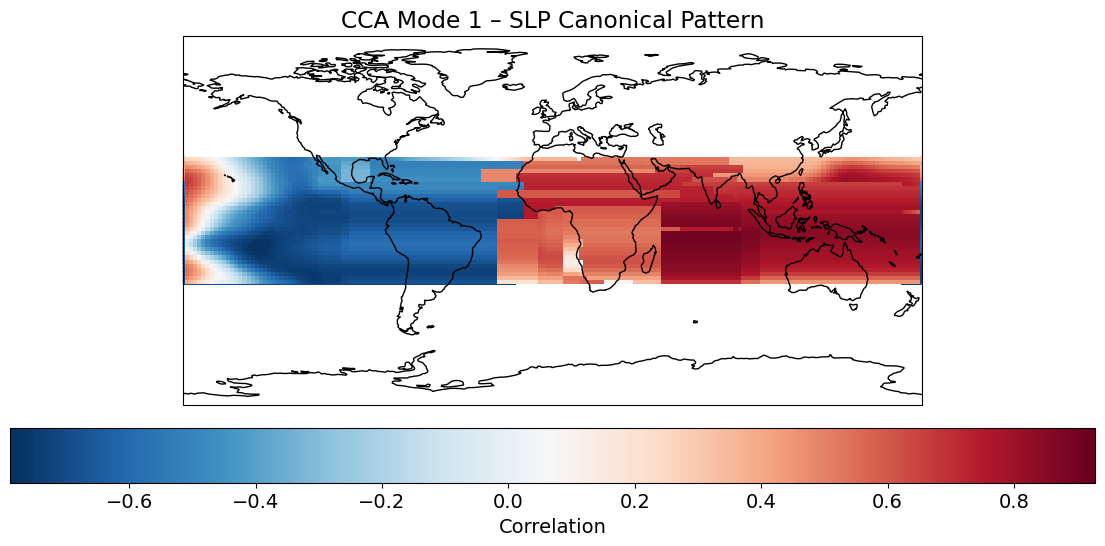

In [57]:
#SLP Canonical Pattern

fig = plt.figure(figsize=(14,6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines()

pc = ax.pcolormesh(
    slp_map.lon,
    slp_map.lat,
    slp_map,
    cmap="RdBu_r",
    transform=ccrs.PlateCarree()
)

cb = plt.colorbar(pc, orientation="horizontal", pad=0.05)
cb.set_label("Correlation")

ax.set_title("CCA Mode 1 – SLP Canonical Pattern")


### Significance testing

##### Monte-Carlo permutation test

In [60]:
def permutation_test(Xp, Yp, n_perm=500):
    perm_corrs = np.zeros(n_perm)

    for i in range(n_perm):
        idx = np.random.permutation(Xp.shape[0])
        cca_p = CCA(n_components=1)
        U_p, V_p = cca_p.fit_transform(Xp, Yp[idx])
        perm_corrs[i] = np.corrcoef(U_p[:,0], V_p[:,0])[0,1]

    return perm_corrs


perm_corrs = permutation_test(X_pca, Y_pca)

p_value = (1 + np.sum(perm_corrs >= canonical_corrs[0])) / (1 + len(perm_corrs))
print("p-value for CCA Mode 1:", p_value)

p-value for CCA Mode 1: 0.001996007984031936


##### The first canonical correlation is statistically significant at $p < 0.002$ based on a Monte-Carlo permutation test.

Text(0.5, 1.0, 'Permutation test – CCA Mode 1')

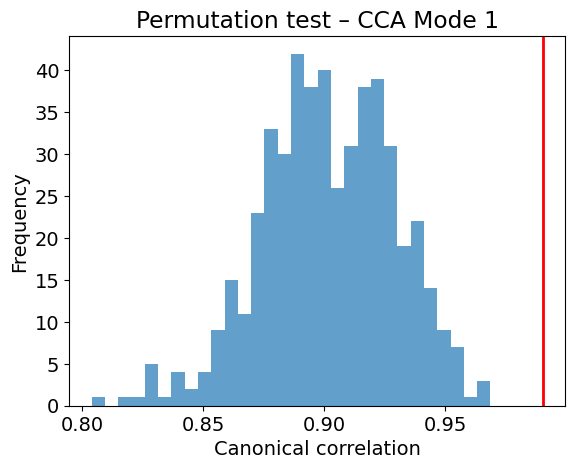

In [61]:
# Visual Diagnostic

plt.figure()
plt.hist(perm_corrs, bins=30, alpha=0.7)
plt.axvline(canonical_corrs[0], color='r', linewidth=2)
plt.xlabel("Canonical correlation")
plt.ylabel("Frequency")
plt.title("Permutation test – CCA Mode 1")


#### **Significance**: The red line is located to the far right, well outside the body of the histogram. This indicates that the correlation found in your actual data is higher than almost any correlation produced by random chance.

### This suggests that the relationship captured in CCA Mode 1 is statistically significant and not a result of random noise.

### Cross-validation

In [62]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)

cv_corrs = []

for train, test in kf.split(X_pca):
    cca_cv = CCA(n_components=1)
    cca_cv.fit(X_pca[train], Y_pca[train])

    U_test, V_test = cca_cv.transform(X_pca[test], Y_pca[test])
    cv_corrs.append(np.corrcoef(U_test[:,0], V_test[:,0])[0,1])

print("Cross-validated correlation:", np.mean(cv_corrs))

Cross-validated correlation: 0.8861550168145957


##### A cross-validated correlation close to 0.9 means that independent data segments still show a strong SST–SLP relationship.

##### This shows that the preprocessing done were correct.

##### The first CCA mode is dominant and robust; For SST–SLP, this typically corresponds to ENSO-scale dynamics.


### The identified SST–SLP relationship is stable and not driven by overfitting.

In [64]:
print("SST variance retained:", np.sum(pca_x.explained_variance_ratio_))
print("SLP variance retained:", np.sum(pca_y.explained_variance_ratio_))

SST variance retained: 0.9101969183658775
SLP variance retained: 0.9077732171553312


### $90\%$ of Variance explained which is ideal

## **physical interpretation of Mode 1**

### **SST pattern**

### The SST canonical map (Mode 1) clearly represents the warm phase of the **El Niño-Southern Oscillation** (ENSO), commonly known as El Niño.
#### Key Evidence for El Niño :
- **Central and Eastern Pacific Warming**: The most prominent feature is the deep red "tongue" (high positive correlation) extending from the coast of South America across the central equatorial Pacific. In an El Niño event, this region becomes significantly warmer than average.

- **The "V" or Horseshoe Pattern**: Flanking the central warmth, you can see blue regions (negative correlation) in the North and South Pacific. This "V" shape of cooler water surrounding the equatorial warmth is a classic signature of the canonical El Niño pattern.

- **Global Teleconnections**: Indian Ocean: There is positive correlation (warmth) across the Indian Ocean, which often occurs in sync with El Niño.

- **Atlantic Ocean**: You can see warm signals in the tropical North Atlantic, another common teleconnection.

- **Western Pacific**: The western "Warm Pool" (near Indonesia/Northern Australia) shows lighter colors or slight cooling, as the warmest water has shifted eastward toward the Americas.

### What this means :

- If the time series for this mode is positive: The earth is experiencing El Niño conditions (matching the red/blue pattern shown).

- If the time series for this mode is negative: The pattern would be "flipped," representing La Niña (cooling in the east, warming in the west).

### **SLP Pattern**

#### The SLP pattern represents the **Southern Oscillation**, which is the atmospheric component of the El Niño-Southern Oscillation (ENSO) cycle.

- ### Pressure is high in the East, and low in the west, driving winds toward Asia.

### We applied Canonical Correlation Analysis to quantify coupled variability between SST and SLP. After seasonal averaging, detrending, and EOF filtering, CCA revealed statistically significant coupled modes, whose spatial patterns resemble physically meaningful climate structures.